# **Polynomial Regression Analysis for LUX Meter Calibration**
---
We are trying to determine here a polynomial ofa certain degree so as to facilitate us in calibration of the **`LUX Meter`** as smooth as possible. The **`ANALOG`** values have been taken from the **`LDR`** and the LUX Values have been taken from **`Samsung Galaxy J7 Pro`**.

## **Low RMSE Polynomial Degree**

The experimental values have been made into a **`numpy`** array and now we will loop through a few polynomial degrees and see which produces the lowest RMSE!

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to fit polynomials and plot the results
def plot_polynomial_fits(x, y, degrees, fig_size=(14, 10)):
    # Prepare the plot
    fig, axs = plt.subplots(2, 2, figsize=fig_size)
    axs = axs.flatten()

    # Loop over each degree
    for idx, degree in enumerate(degrees):
        # Fit polynomial of current degree
        p = np.polyfit(x, y, degree)
        poly = np.poly1d(p)
        
        # Generate x values for plotting the polynomial
        x_new = np.linspace(min(x), max(x), 100)
        y_new = poly(x_new)
        
        # Calculate predicted y values for given x data points
        y_pred = poly(x)
        
        # Calculate RMSE
        rmse = calculate_rmse(y, y_pred)
        
        # Plot data points and polynomial fit
        axs[idx].scatter(x, y, color='red', label='Data Points')
        axs[idx].plot(x_new, y_new, color='blue', label=f'Polynomial Degree {degree}')
        axs[idx].set_xlabel('Analog Value')
        axs[idx].set_ylabel('Light Intensity (lux)')
        axs[idx].legend()
        axs[idx].set_title(f'Degree {degree} (RMSE: {rmse:.2f})')
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

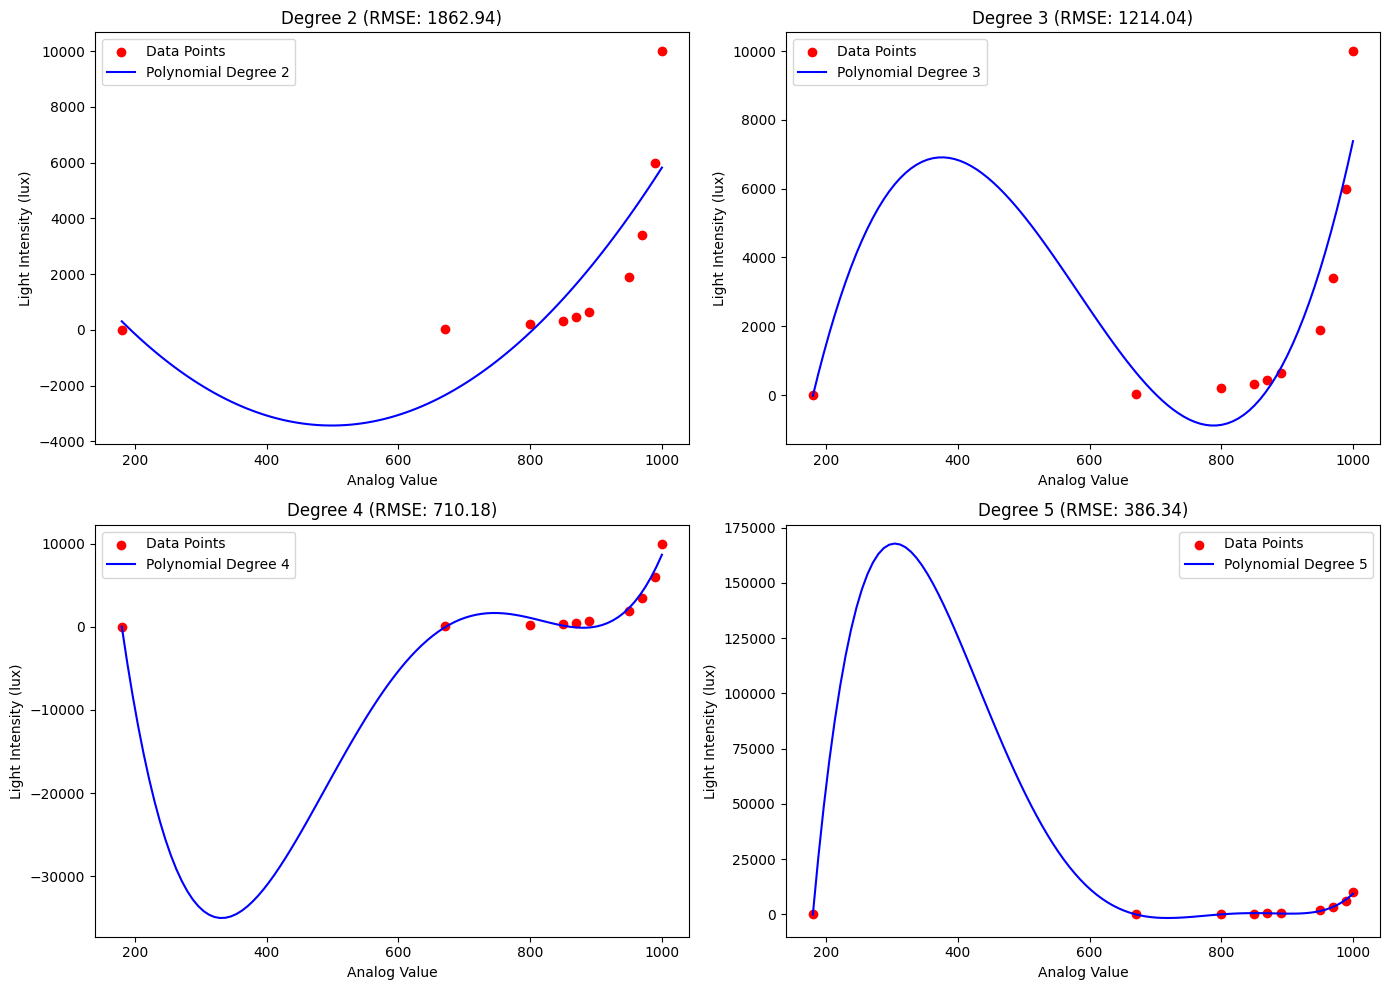

In [3]:
# Data points
x = np.array([180, 670, 800, 850, 870, 890, 950, 970, 990, 1000])
y = np.array([0, 40, 200, 320, 450, 630, 1900, 3400, 6000, 10000])

# Degrees of polynomials to fit
degrees = [2, 3, 4, 5]

# Call the function to plot polynomial fits
plot_polynomial_fits(x, y, degrees)

- We can clearly see that, higher the degree, lesser the **`RMSE`** value, which means that <u>**`better the fit`**</u> but that also means that <u>**`higher the overfitting`**</u>!

## **Workaround**

One possible solution is to define a separate polynomial for analog values below 800 and a different degree for above it. Below we try to plot graphs but without values under 800.

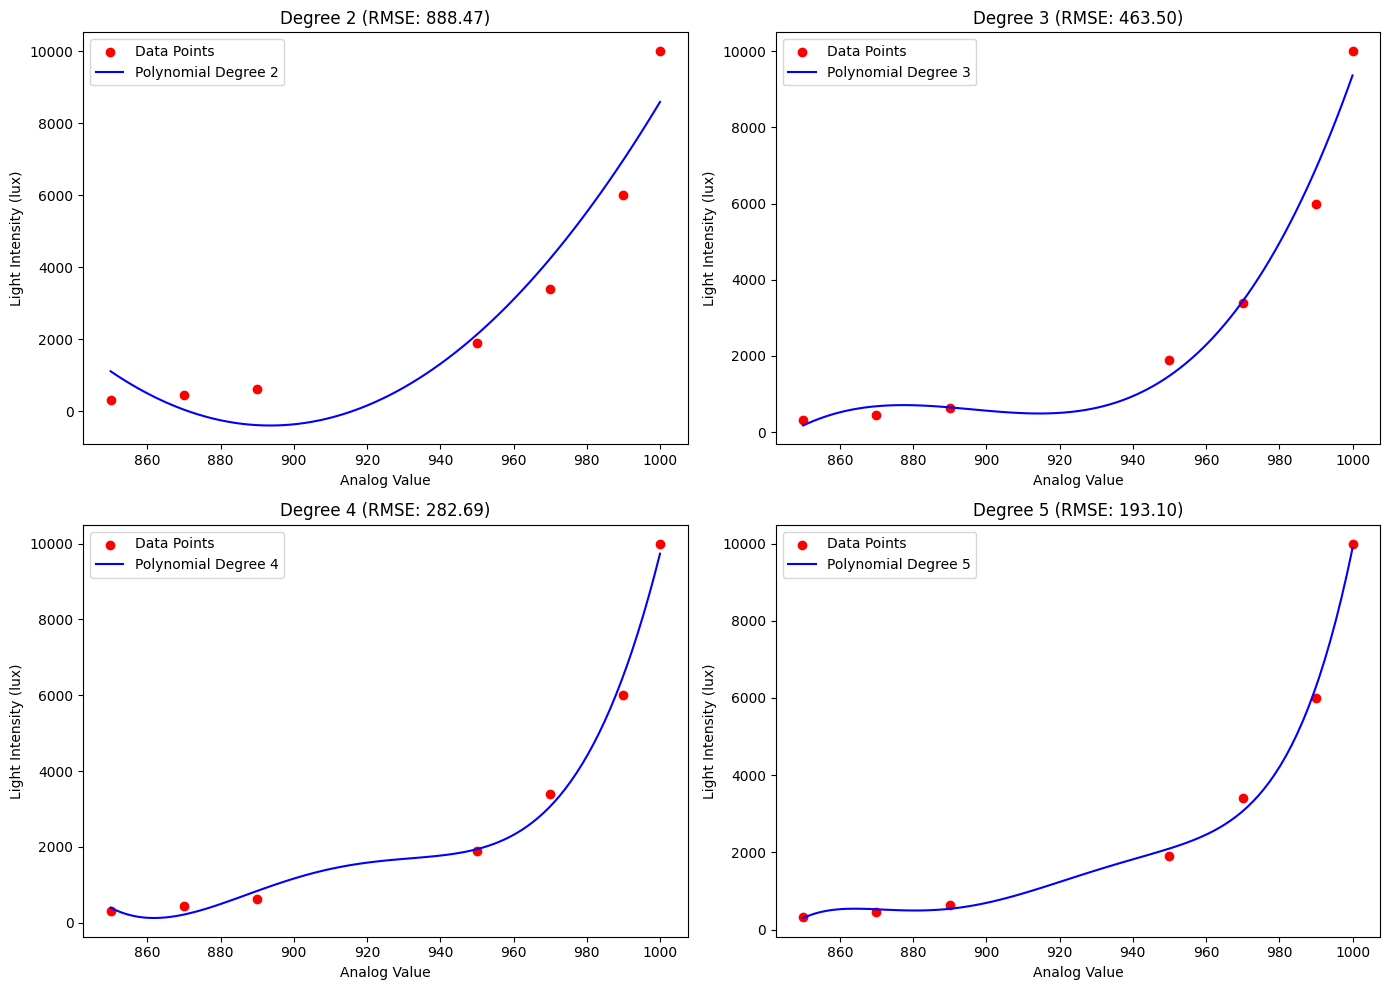

In [7]:
# Data points
x = np.array([850, 870, 890, 950, 970, 990, 1000])
y = np.array([320, 450, 630, 1900, 3400, 6000, 10000])

# Degrees of polynomials to fit
degrees = [2,3,4,5]

# Call the function to plot polynomial fits
plot_polynomial_fits(x, y, degrees)

- **`Deg 2`** has the worst fitting.
- **`Deg 3`** and **`4`** has somewhat good fitting.
- **`Deg 5`** has overfitting.

So, between **`Deg 3`** and **`Deg 4`** we choose **`Deg 4`** as it has lesser **`RMSE`**.

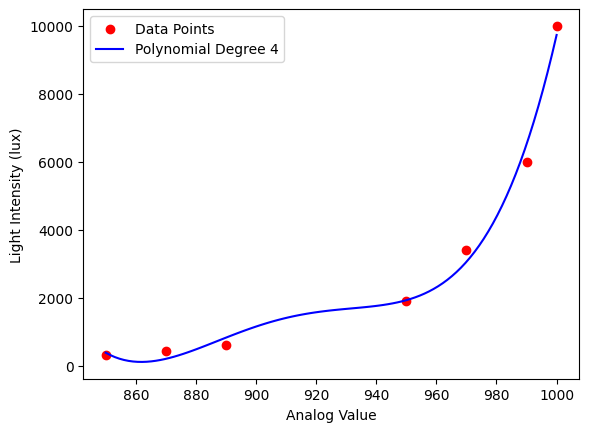

Polynomial Coefficients (Degree 4): [ 1.49971935e-04 -5.45547466e-01  7.43741376e+02 -4.50342742e+05
  1.02186631e+08]


In [8]:
# Fit a polynomial of degree n
degree = 4  # You can change this to other degrees to see how it fits
p = np.polyfit(x, y, degree)

# Polynomial function
poly = np.poly1d(p)

# Generate x values for plotting the polynomial
x_new = np.linspace(min(x), max(x), 100)
y_new = poly(x_new)

# Plot data points and polynomial
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_new, y_new, color='blue', label=f'Polynomial Degree {degree}')
plt.xlabel('Analog Value')
plt.ylabel('Light Intensity (lux)')
plt.legend()
plt.show()

# Print polynomial coefficients
print(f'Polynomial Coefficients (Degree {degree}): {p}')

C:\Users\manji\AppData\Local\Temp\ipykernel_12432\1142286773.py:14: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, degree)
C:\Users\manji\AppData\Local\Temp\ipykernel_12432\1142286773.py:14: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x, y, degree)


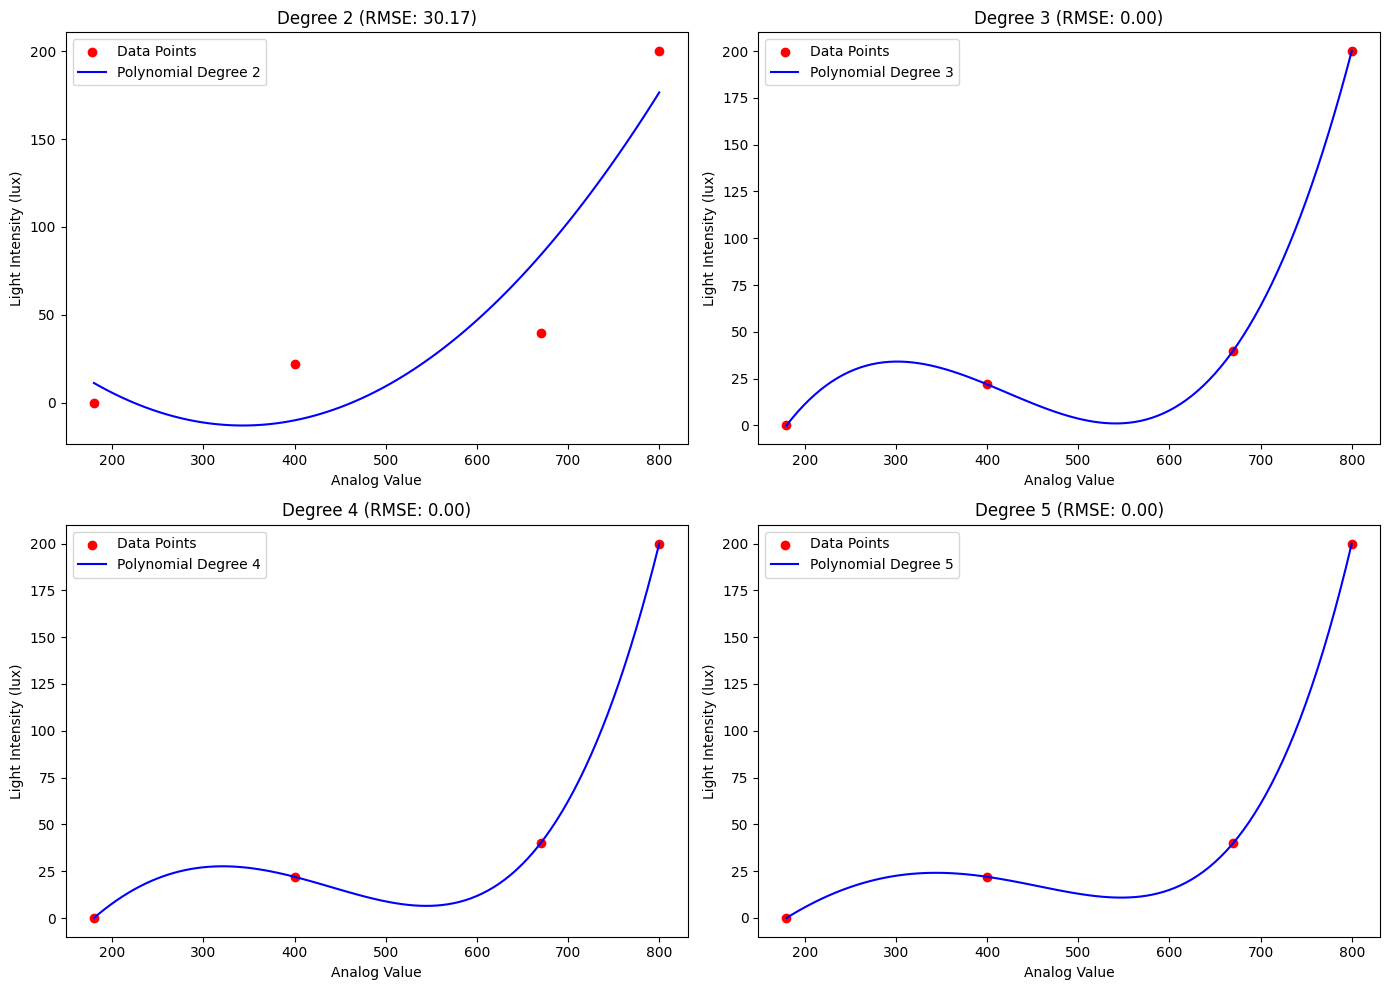

In [10]:
# Data points
x = np.array([180, 400, 670, 800])
y = np.array([0, 22, 40, 200])

# Degrees of polynomials to fit
degrees = [2, 3, 4, 5]

# Call the function to plot polynomial fits
plot_polynomial_fits(x, y, degrees)